In [11]:
#
# Carga de datos
#
import nbimporter  #  type: ignore
import functions  #  type: ignore
from importlib import reload


df_orig = functions.load_data()
display(df_orig.head())
display(df_orig.shape)

,yt_true
date,
1946-01-01,890
1946-02-01,992
1946-03-01,979
1946-04-01,959
1946-05-01,1110


(252, 1)

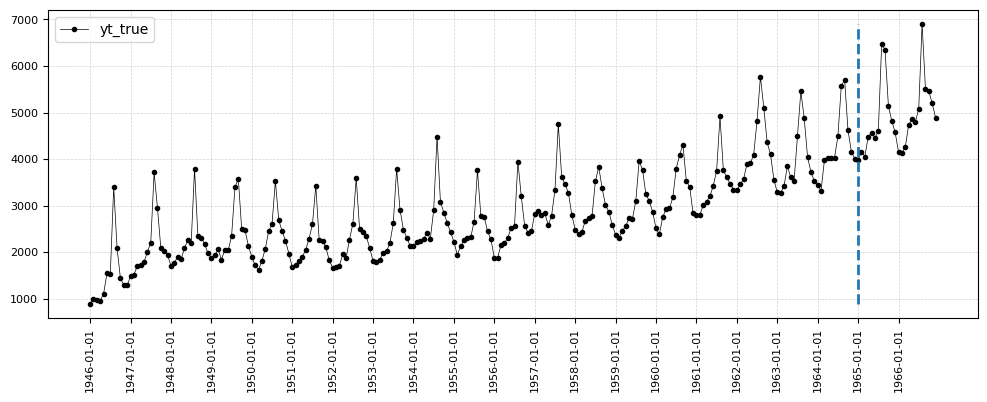

In [12]:
#
# Grafico de la serie
# La serie correspondiente al número total de personas empleadas
# mensualmente como mano de obra en el condado de Sutter
# (California) entre 1946:01 y 1966:12. Se deben usar los primeros
# 228 (de 1946:1 a 1964:12) datos para especificar el modelo y los
# 24 datos restantes (1965:1 a 1966:12) para evaluar el pronóstico
# un mes adelante por fuera de la muestra de calibración de
# los parámetros.
#
functions.plot_time_series(df_orig)

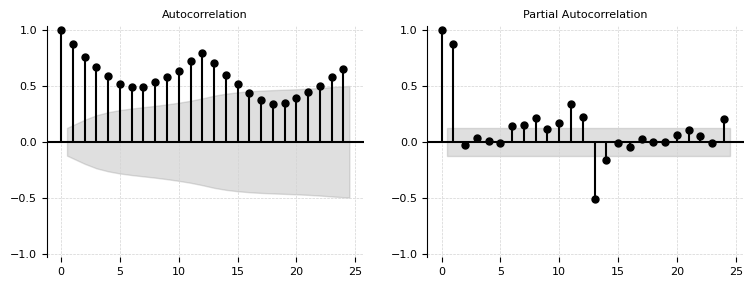

In [ ]:
#
# Autocorrelograma simple
#
reload(functions) # Recarga el módulo para asegurarte de usar la versión actualizada
from functions import acf_pacf_plots
functions.acf_pacf_plots(df_orig.yt_true)

date
1946-01-01       NaN
1946-02-01     102.0
1946-03-01     -13.0
1946-04-01     -20.0
1946-05-01     151.0
1946-06-01     436.0
1946-07-01      -7.0
1946-08-01    1862.0
1946-09-01   -1309.0
1946-10-01    -656.0
1946-11-01    -135.0
1946-12-01     -14.0
1947-01-01     201.0
1947-02-01      29.0
1947-03-01     190.0
Name: yt_d1_true, dtype: float64

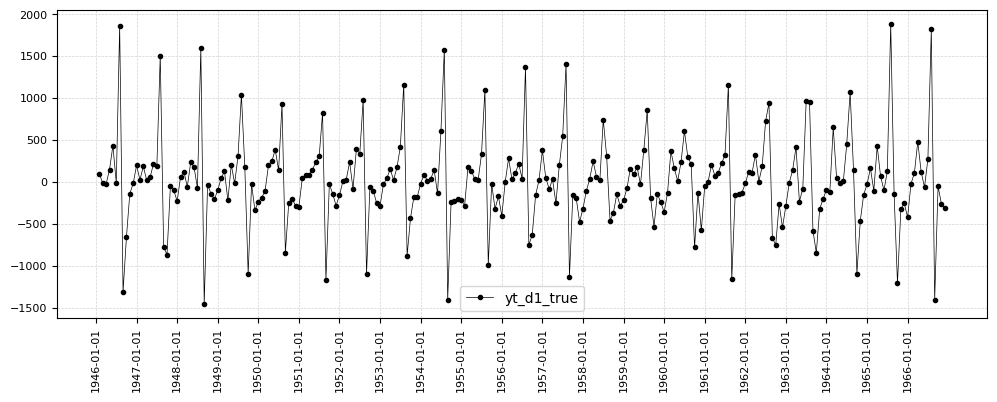

In [14]:
#
# Diferenciación simple de la serie
#
df_orig = df_orig.assign(yt_d1_true=df_orig.yt_true.diff(1))
display(df_orig.yt_d1_true.head(15))
functions.plot_time_series(df_orig, yt_col="yt_d1_true")

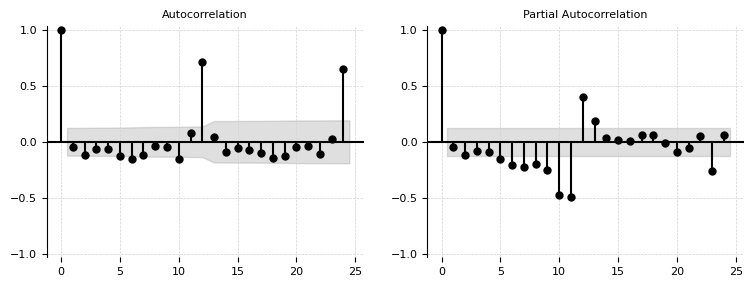

In [15]:
## Correlogramas simple y parcial
functions.acf_pacf_plots(df_orig.yt_d1_true.dropna())

date
1946-01-01      NaN
1946-02-01      NaN
1946-03-01      NaN
1946-04-01      NaN
1946-05-01      NaN
1946-06-01      NaN
1946-07-01      NaN
1946-08-01      NaN
1946-09-01      NaN
1946-10-01      NaN
1946-11-01      NaN
1946-12-01      NaN
1947-01-01    598.0
1947-02-01    525.0
1947-03-01    728.0
Name: yt_d12_true, dtype: float64

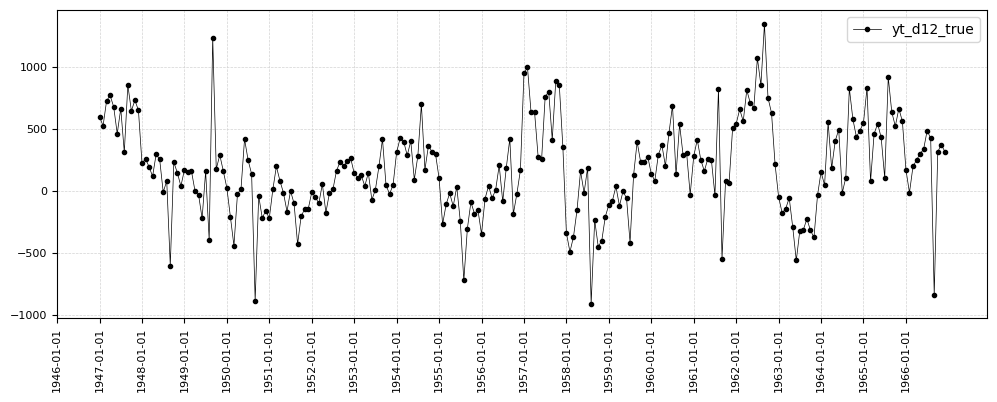

In [16]:
## Diferenciación esticional de los 12 meses
df_orig = df_orig.assign(yt_d12_true=df_orig.yt_true.diff(12))
display(df_orig.yt_d12_true.head(15))
functions.plot_time_series(df_orig, yt_col="yt_d12_true")

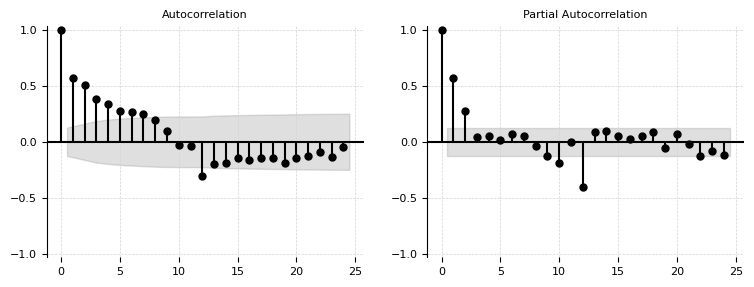

In [19]:
#
# Autocorrelograma simple
#
functions.acf_pacf_plots(df_orig.yt_d12_true.dropna())